# **1ο ΜΕΡΟΣ: Ανίχνευση Ακμών σε Γκρίζες Εικόνες**

In [1]:
#Απαραίτητες Βιβλιοθήκες
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
%matplotlib inline
import math

# **1.1 Δημιουργία Εικόνων Εισόδου**

# 1.1.1. Ανάγνωση και Κανονονικοποίηση Εικόνας 

Text(0.5, 1.0, 'Normalized Image (Range 0 - 1 )')

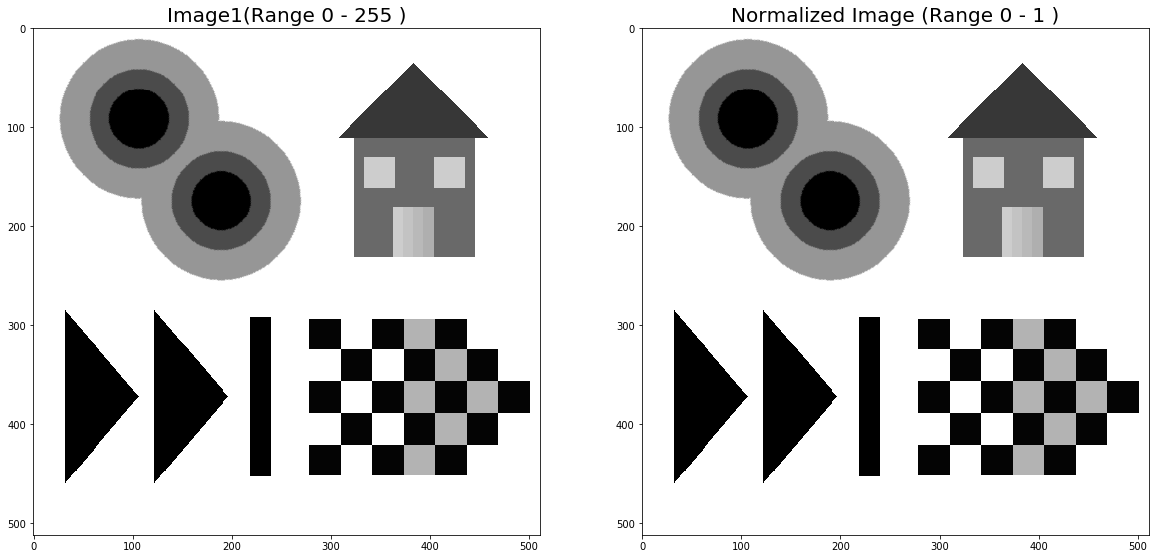

In [2]:
#1.1.1 Ανάγνωση - Κανονικοποίηση Εικόνας 
img = cv2.imread('edgetest_20.png',cv2.IMREAD_GRAYSCALE)
n_img = img.astype(np.float)/255


#Μax-Μin Αρχικής Εικόνας 
Imin = img.min()
Imax = img.max()

#Μax-Μin Κανονικοποιημένης Εικόνας 
N_Imin = n_img.min()
N_Imax = n_img.max()


f, (ax0,ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img,cmap='gray')
ax0.set_title("Image1(Range %d - %d )" %(Imin,Imax), fontsize=20)

ax1.imshow(n_img,cmap='gray')
ax1.set_title("Normalized Image (Range %d - %d )" %(N_Imin,N_Imax), fontsize=20)


# 1.1.2. Προσθήκη Θορύβου στην Εικόνα

Text(0.5, 1.0, 'SNR : 10, sigma: 0.316228 ')

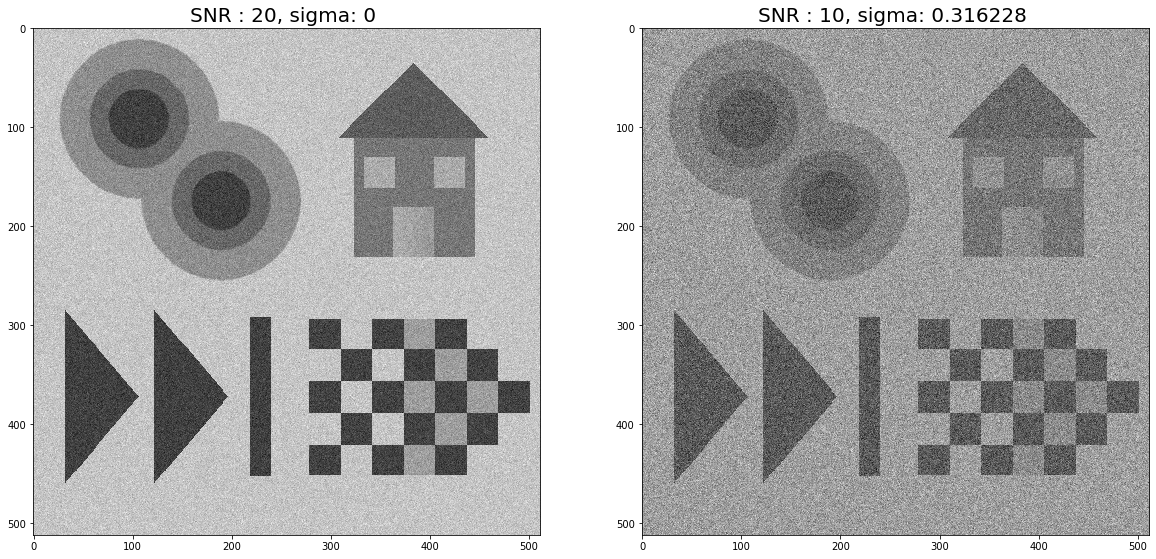

In [3]:
#1.1.2 Προσθήκη θορύύβου 

Imax = np.amax(n_img)
Imin = np.amin(n_img)

mean = 0

(row,col)=n_img.shape

PSNR1=20
PSNR2=10

sn1=(Imax-Imin)/(10**(PSNR1/20))
sn2=(Imax-Imin)/(10**(PSNR2/20))

gauss=  np.random.normal(mean,sn1,(row,col))
gauss = gauss.reshape(row,col)
noisy = gauss + n_img 

gauss2=  np.random.normal(mean,sn2,(row,col))
gauss2 = gauss2.reshape(row,col)
noisy2 = gauss2 + n_img 

f, (ax0,ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(noisy , cmap='gray')
ax0.set_title("SNR : %d, sigma: %d " %(PSNR1,sn1), fontsize=20)
ax1.imshow(noisy2, cmap='gray')
ax1.set_title("SNR : %d, sigma: %f " %(PSNR2,sn2), fontsize=20)

# **1.2 Υλοποίηση Αλγορίθμων Ανίχνευσης Ακμών**

# 1.2.1 Δημιουργία των κρουστικών αποκρίσεων 

*   Διδιάστατη Gaussian
*   Laplacian-of-Gaussian



# Διδιάστατη Gaussian

In [4]:
#1.2.1 Δισδιάάστατη Guassian για σ = 2 
sigma =2
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma)     # Column vector
gauss2D = gauss1D @ gauss1D.T                 # Symmetric gaussian kernel

img_smooth = cv2.filter2D(noisy, -1, gauss2D) 
smooth = cv2.filter2D(noisy2, -1, gauss2D) 

In [5]:
#      Δισδιάστατη Guassian για σ = 4 
sigma = 4
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma)     # Column vector
gauss2D = gauss1D @ gauss1D.T                 # Symmetric gaussian kernel

img_smooth_2 = cv2.filter2D(noisy, -1, gauss2D)
smooth2 = cv2.filter2D(noisy2, -1, gauss2D) 

Text(0.5, 1.0, 'Συνέλιξη με 2D Gaussian (σ = 4)')

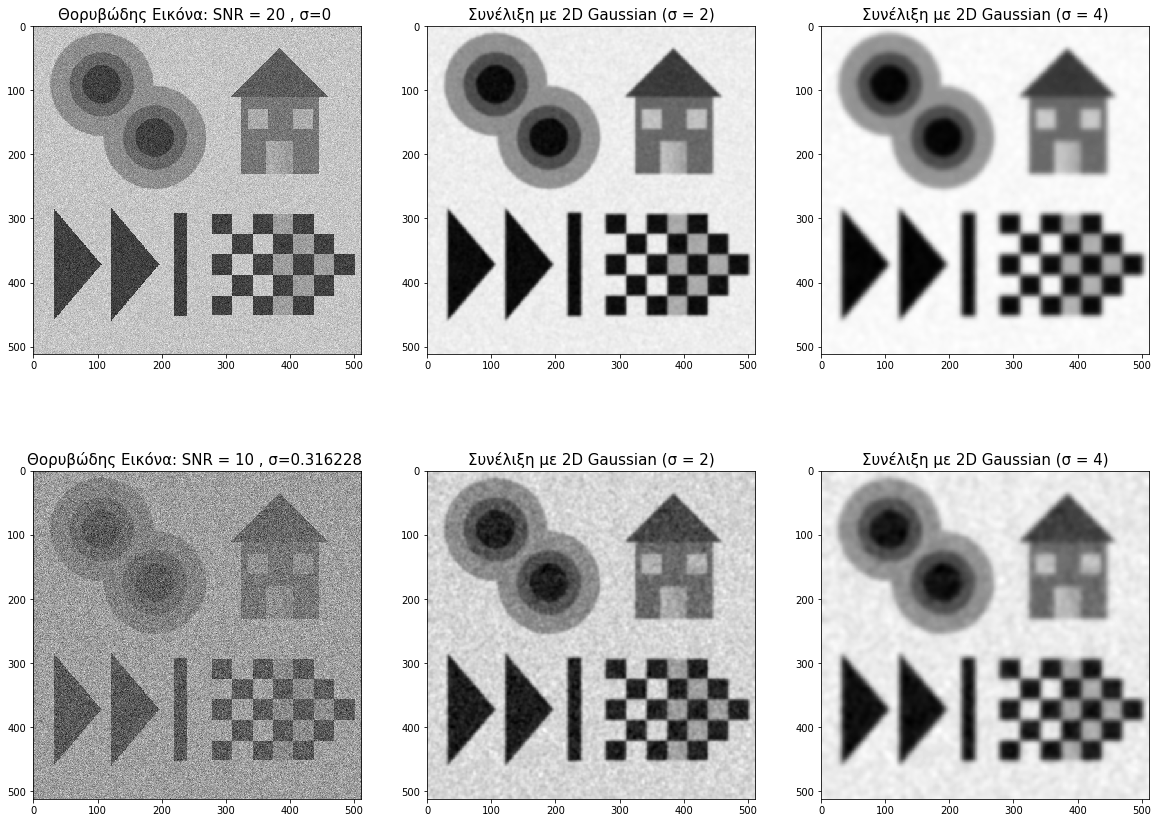

In [6]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2, 3, figsize = (20,15))
ax0.imshow(noisy,cmap='gray')
ax0.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0 ',fontsize =15)
ax1.imshow(img_smooth, cmap='gray')
ax1.set_title('Συνέλιξη με 2D Gaussian (σ = 2)',fontsize =15)
ax2.imshow(img_smooth_2, cmap='gray')
ax2.set_title('Συνέλιξη με 2D Gaussian (σ = 4)',fontsize =15)

ax3.imshow(noisy2,cmap='gray')
ax3.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228 ',fontsize =15)
ax4.imshow(smooth, cmap='gray')
ax4.set_title('Συνέλιξη με 2D Gaussian (σ = 2)',fontsize =15)
ax5.imshow(smooth2, cmap='gray')
ax5.set_title('Συνέλιξη με 2D Gaussian (σ = 4)',fontsize =15)


# 1.2.2. Προσέγγιση της Laplacian L

*   Γραμμικά
*   Μη γραμμικά



# Laplacian of Gaussian (LoG) - Γραμμικά

In [7]:
#Laplacian-of-Gaussian (LoG) 
result1 = ndimage.gaussian_laplace(noisy, sigma=2)
result2 = ndimage.gaussian_laplace(noisy, sigma=4)

res1 = ndimage.gaussian_laplace(noisy2, sigma=2)
res2 = ndimage.gaussian_laplace(noisy2, sigma=4)

Text(0.5, 1.0, 'Εξομλαύνση με LoG(σ=4) Γραμμικά)')

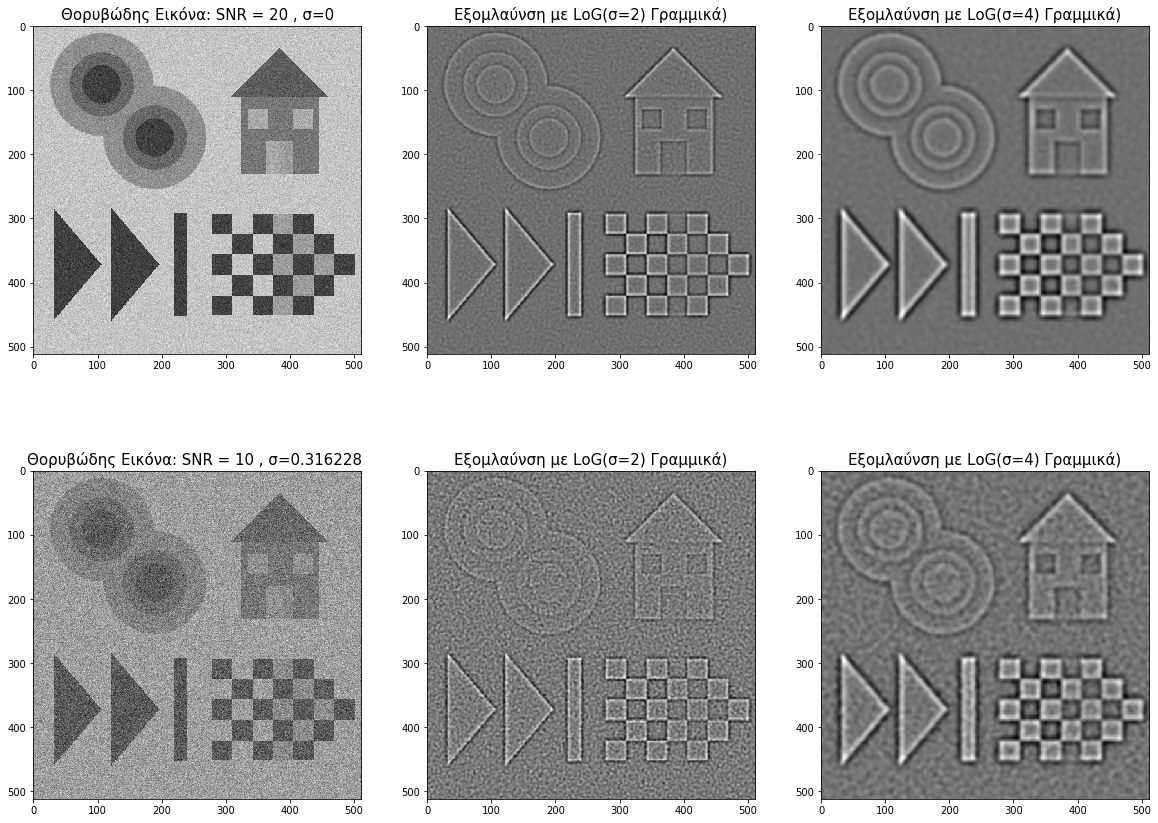

In [8]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2, 3, figsize = (20,15))

ax0.imshow(noisy,cmap='gray')
ax0.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0',fontsize =15)
ax1.imshow(result1, cmap='gray')
ax1.set_title('Εξομλαύνση με LoG(σ=2) Γραμμικά)',fontsize =15)
ax2.imshow(result2, cmap='gray')
ax2.set_title('Εξομλαύνση με LoG(σ=4) Γραμμικά)',fontsize =15)

ax3.imshow(noisy2,cmap='gray')
ax3.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228 ',fontsize =15)
ax4.imshow(res1, cmap='gray')
ax4.set_title('Εξομλαύνση με LoG(σ=2) Γραμμικά)',fontsize =15)
ax5.imshow(res2, cmap='gray')
ax5.set_title('Εξομλαύνση με LoG(σ=4) Γραμμικά)',fontsize =15)


# Laplacian of Gaussian (LoG) - Μη Γραμμικά

In [9]:
# Μη γραμμική εκτίίμηση Laplacian 
kern = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=np.uint8)

In [10]:
dilated_img = cv2.dilate(img_smooth, kern)
dilated_img2 = cv2.dilate(smooth, kern)

In [11]:
eroded_img = cv2.erode(img_smooth, kern)
eroded_img2 = cv2.erode(smooth, kern)

In [12]:
I = dilated_img + eroded_img -2*img_smooth
I2 = dilated_img2 + eroded_img2 -2*smooth

Text(0.5, 1.0, 'Εξομάλυνση Εικόνας με LoG (Μη γραμμικά)')

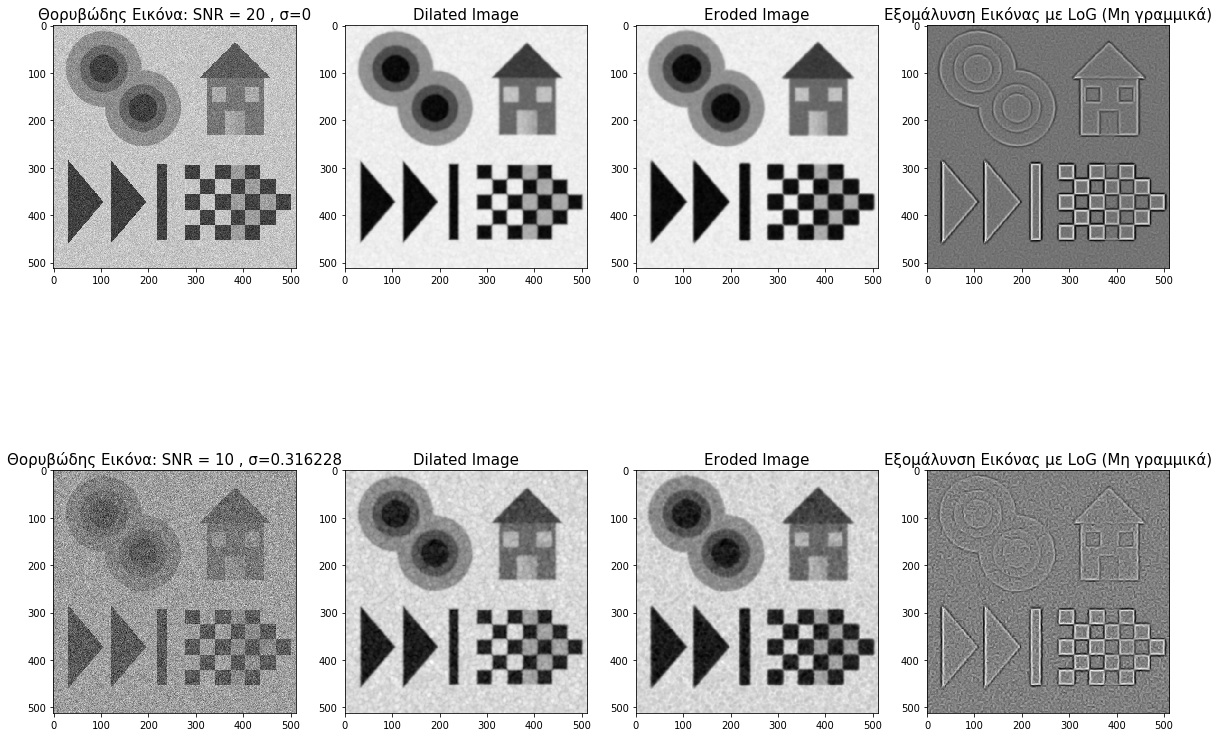

In [13]:
fig, ((ax0,ax1,ax2,ax3),(ax4,ax5,ax6,ax7))  = plt.subplots(2, 4, figsize = (20,15))
ax0.imshow(noisy,cmap='gray')
ax0.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0',fontsize =15)

ax1.imshow(dilated_img, cmap='gray')
ax1.set_title('Dilated Image',fontsize =15)

ax2.imshow(eroded_img, cmap='gray')
ax2.set_title('Eroded Image',fontsize =15)

ax3.imshow(I , cmap='gray')
ax3.set_title('Εξομάλυνση Εικόνας με LoG (Μη γραμμικά)',fontsize =15)

ax4.imshow(noisy2,cmap='gray')
ax4.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228',fontsize =15)

ax5.imshow(dilated_img2, cmap='gray')
ax5.set_title('Dilated Image',fontsize =15)

ax6.imshow(eroded_img2, cmap='gray')
ax6.set_title('Eroded Image',fontsize =15)

ax7.imshow(I2 , cmap='gray')
ax7.set_title('Εξομάλυνση Εικόνας με LoG (Μη γραμμικά)',fontsize =15)




# 1.2.3 Προσέγγιση των Ζerocrossings

*   Μη Γραμμική
*   Γραμμική 



In [14]:
#1.2.3 Zero Crossings για μη γραμμική

#Δυαδική Εικόνα προσήμου 
X= (I >= 0) 
X=X*1
X=X.astype(np.float)

X_new =(I2 >= 0) 
X_new =X_new*1
X_new=X_new.astype(np.float)

#Σύνορο
Y = cv2.dilate(X, kern)-cv2.erode(X, kern)
Y_new = cv2.dilate(X_new, kern)-cv2.erode(X_new, kern)

In [15]:
#Zero Crossings για Γραμμική
#Δυαδική Εικόνα προσήμου
X2 = (result1>= 0 ) 
X2=X2*1
X2=X2.astype(np.float)

#Σύνορο

X2_new =(res1 >= 0) 
X2_new =X_new*1
X2_new=X_new.astype(np.float)


Y2 = cv2.dilate(X2, kern)-cv2.erode(X2, kern)
Y2_new = cv2.dilate(X2_new, kern)-cv2.erode(X2_new, kern)

Text(0.5, 1.0, 'Zero Crossings-Μη Γραμμική προσέγγιση(L2)')

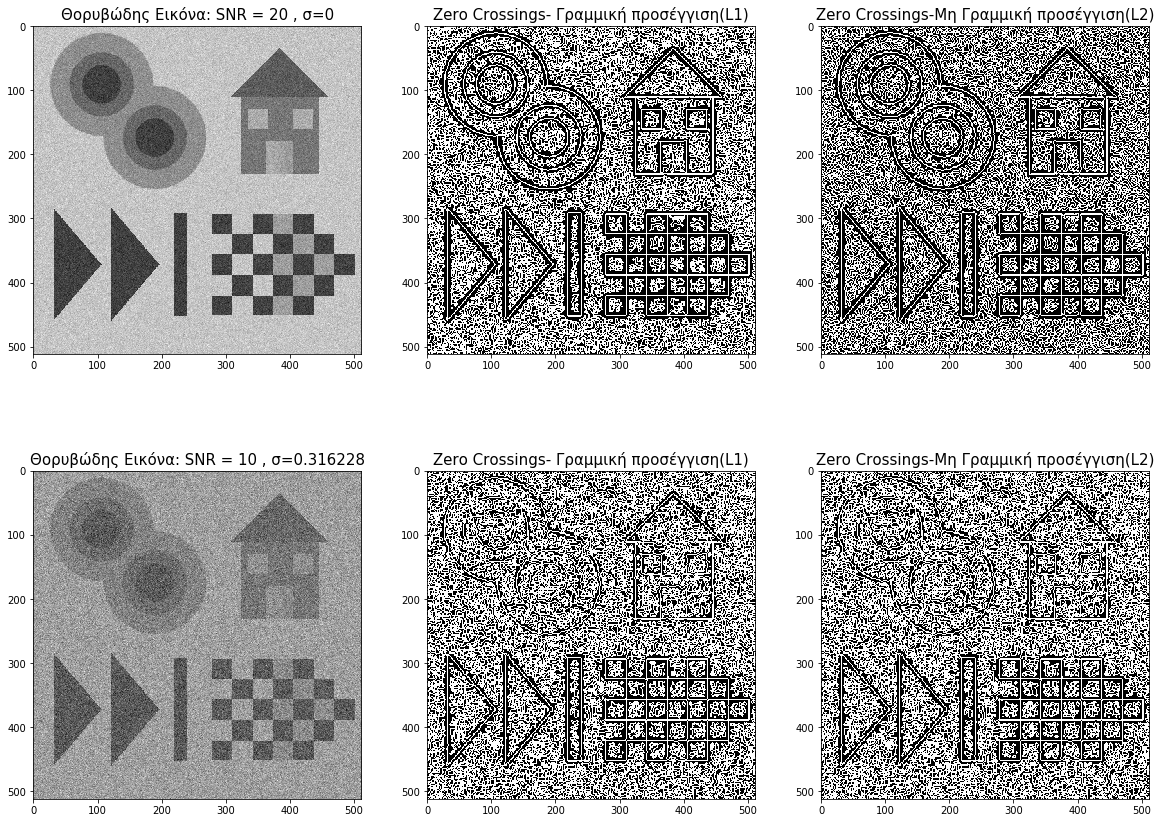

In [16]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2, 3, figsize = (20,15))

ax0.imshow(noisy,cmap='gray')
ax0.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0',fontsize =15)

ax1.imshow(Y,cmap='gray')
ax1.set_title('Zero Crossings- Γραμμική προσέγγιση(L1)',fontsize =15)

ax2.imshow(Y2, cmap='gray')
ax2.set_title('Zero Crossings-Μη Γραμμική προσέγγιση(L2)',fontsize =15)

ax3.imshow(noisy2,cmap='gray')
ax3.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228',fontsize =15)

ax4.imshow(Y_new,cmap='gray')
ax4.set_title('Zero Crossings- Γραμμική προσέγγιση(L1)',fontsize =15)

ax5.imshow(Y2_new, cmap='gray')
ax5.set_title('Zero Crossings-Μη Γραμμική προσέγγιση(L2)',fontsize =15)

# 1.2.4 Απόρριψη των zerocrossings
*   Γραμμική
*   Μη Γραμμική 

In [17]:
#1.2.4 Απόρριψη των zerocrossings
import math
[fx,fy] = np.gradient(img_smooth)
gradientIm=np.sqrt(np.power(fx, 2)+np.power(fy, 2))
maxofIm=np.amax(gradientIm)

[fx1,fy1] = np.gradient(smooth)
gradientIm1=np.sqrt(np.power(fx1, 2)+np.power(fy1, 2))
maxofIm1=np.amax(gradientIm1)





#Γραμμική Περίπτωση
FinalZr = (Y2 == 1)*1 & (abs(gradientIm)>0.19*maxofIm)
FinalZr_new = (Y2_new == 1)*1 & (abs(gradientIm1)>0.28*maxofIm1)

In [18]:
#Μη Γραμμική Περίπτωση
FinalZr2 = (Y == 1)*1 & (abs(gradientIm)>0.19*maxofIm)
FinalZr2_new = (Y_new == 1)*1 & (abs(gradientIm1)>0.28*maxofIm1)


Text(0.5, 1.0, 'Τελική Επιλογή-Μη Γραμμική προσέγγιση(L2)')

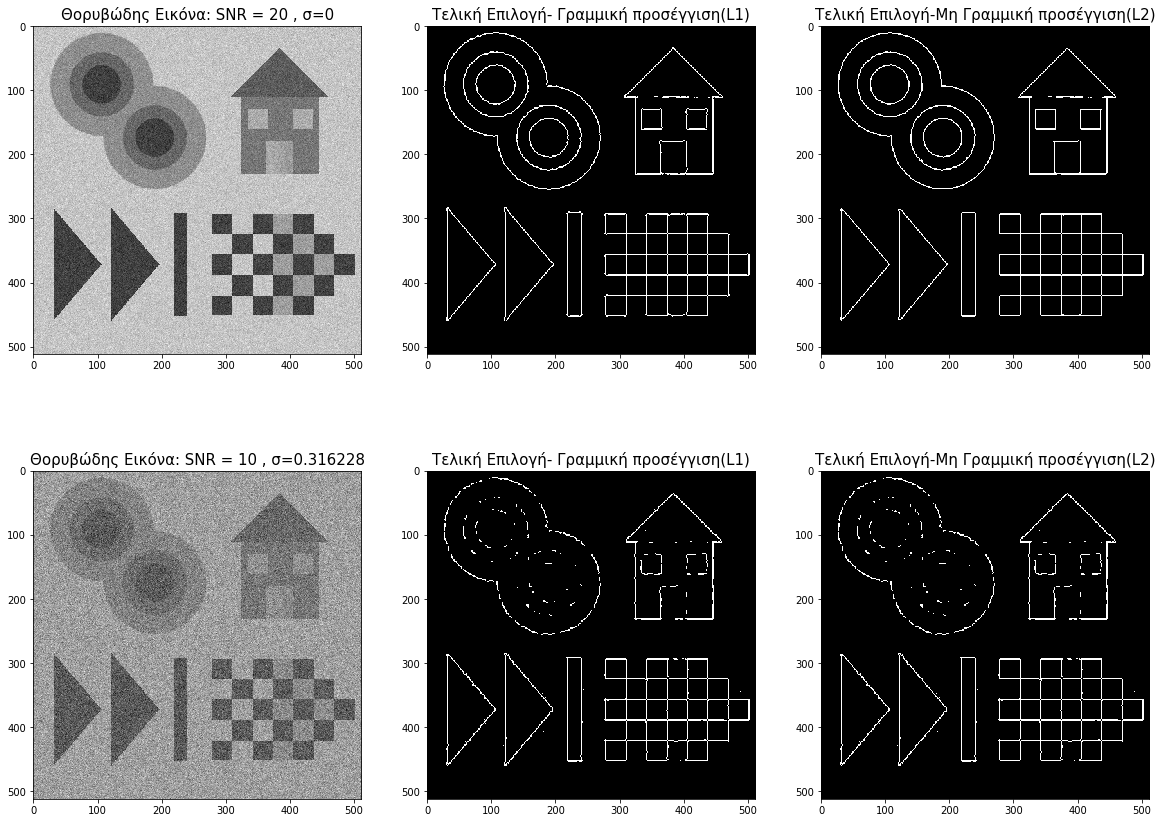

In [19]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5))  = plt.subplots(2, 3, figsize = (20,15))

ax0.imshow(noisy,cmap='gray')
ax0.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0',fontsize =15)

ax1.imshow(FinalZr,cmap='gray')
ax1.set_title('Τελική Επιλογή- Γραμμική προσέγγιση(L1)',fontsize =15)

ax2.imshow(FinalZr2, cmap='gray')
ax2.set_title('Τελική Επιλογή-Μη Γραμμική προσέγγιση(L2)',fontsize =15)



ax3.imshow(noisy2,cmap='gray')
ax3.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228',fontsize =15)

ax4.imshow(FinalZr_new,cmap='gray')
ax4.set_title('Τελική Επιλογή- Γραμμική προσέγγιση(L1)',fontsize =15)

ax5.imshow(FinalZr2_new, cmap='gray')
ax5.set_title('Τελική Επιλογή-Μη Γραμμική προσέγγιση(L2)',fontsize =15)

# Συνάρτηση Edge Detect 

In [20]:
#Κατασκευή Συνάρτησης EdgeDetect 
def EdgeDetect(Image,sigma,theta,type):
  
  n = int(2*np.ceil(3*sigma)+1)

  
  kern = np.array([
  [0,1,0],
  [1,1,1],
  [0,1,0]
  ], dtype=np.uint8)


  gauss1D = cv2.getGaussianKernel(n, sigma) # Column vector
  gauss2D = gauss1D @ gauss1D.T             # Symmetric gaussian kernel
  img_smooth_2 = cv2.filter2D(Image, -1, gauss2D)

  [fx,fy] = np.gradient(img_smooth_2)
  gradientIm=np.sqrt(np.power(fx, 2)+np.power(fy, 2))
  maxofIm=np.amax(gradientIm)

  if type == "Linear":
    L1 = ndimage.gaussian_laplace(Image, sigma)
    #Προσέγγιση της Laplacian L1
    #Zero Crossings of L1
    X1 = (L1 >= 0 ) 
    X1=X1*1
    X1=X1.astype(np.float)
    #Περίγραμμα Χ1
    Y1 = cv2.dilate(X1, kern)-cv2.erode(X1, kern)
    #Τελική επιλογή Zero Crossings L1


    FinalZr = (Y1 == 1)*1 & (abs(gradientIm)>theta*maxofIm)

  elif type == "Non Linear":
    #Προσέγγιση της Laplacian L2
    dilated_img = cv2.dilate(img_smooth_2, kern)
    eroded_img  = cv2.erode(img_smooth_2, kern)
    
    L2 = dilated_img + eroded_img -2*img_smooth_2
    #Zero Crossings of L2

    X2= (L2 >= 0) 
    X2=X2*1
    X2=X2.astype(np.float)

    #Περίγραμμα Χ2
    Y2 = cv2.dilate(X2, kern)-cv2.erode(X2, kern)
    #Τελική επιλογή Zero Crossings L2
    FinalZr = (Y2 == 1)*1 & (abs(gradientIm)>theta*maxofIm)
  return FinalZr

# **1.3 Αξιολόγηση των Αποτελεσμάτων Ανίχνευσης Ακμών**

Text(0.5, 1.0, '4.Non Linear(σ,θ)=(3.0 , 0.2)')

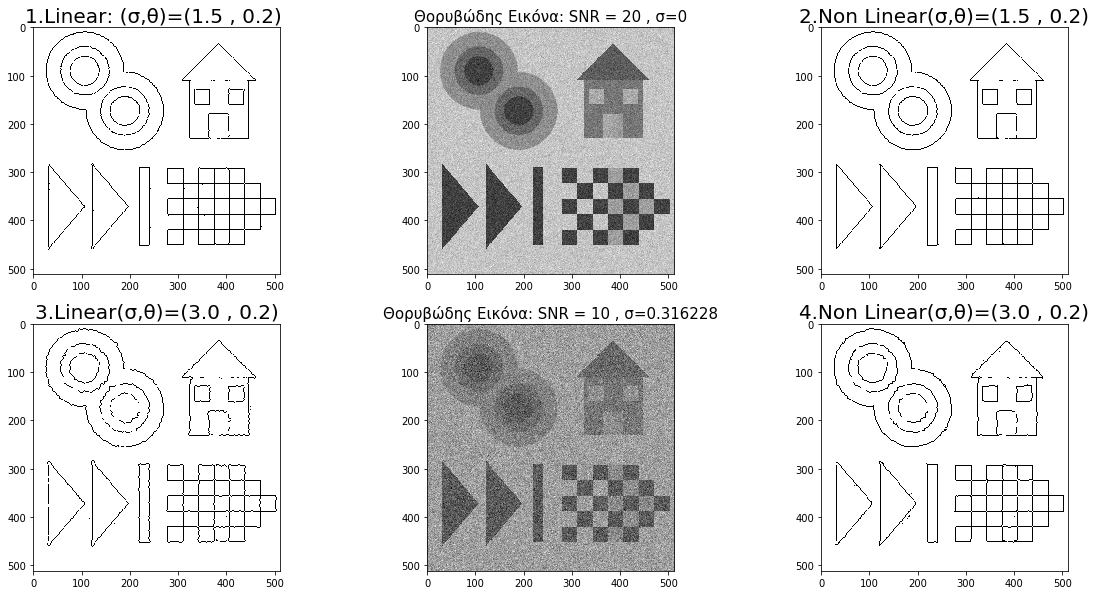

In [21]:
test_image1 = EdgeDetect(noisy,1.5,0.2,"Linear")
test_image2 = EdgeDetect(noisy,1.5,0.2,"Non Linear")

test_image3 = EdgeDetect(noisy2,3,0.2,"Linear")
test_image4 = EdgeDetect(noisy2,3,0.2,"Non Linear")

f, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2, 3, figsize=(20, 10))
ax0.imshow(test_image1 , cmap='gray_r')
ax0.set_title("1.Linear: (σ,θ)=(1.5 , 0.2) ",fontsize=20)

ax1.imshow(noisy,cmap='gray')
ax1.set_title('Θορυβώδης Εικόνα: SNR = 20 , σ=0',fontsize =15)

ax2.imshow(test_image2, cmap='gray_r')
ax2.set_title("2.Non Linear(σ,θ)=(1.5 , 0.2)",fontsize=20)

ax3.imshow(test_image3 , cmap='gray_r')
ax3.set_title("3.Linear(σ,θ)=(3.0 , 0.2)",fontsize=20)

ax4.imshow(noisy2,cmap='gray')
ax4.set_title('Θορυβώδης Εικόνα: SNR = 10 , σ=0.316228',fontsize =15)

ax5.imshow(test_image4, cmap='gray_r')
ax5.set_title("4.Non Linear(σ,θ)=(3.0 , 0.2)",fontsize=20)

# 1.3.1 Υπολογισμός των αληθινών ακμών από Αρχική Εικόνα

Text(0.5, 1.0, 'Αληθινές Ακμές Αρχικής Εικόνας')

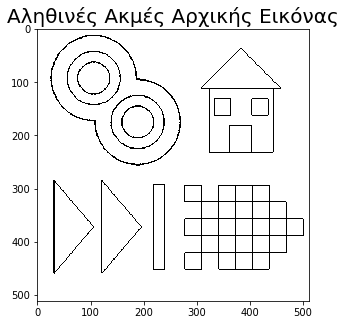

In [22]:
kern = np.array([
  [0,1,0],
  [1,1,1],
  [0,1,0]
], dtype=np.uint8)

thetarealedge=0.1

dilated_img = cv2.dilate(n_img, kern)
eroded_img = cv2.erode(n_img, kern)
M =dilated_img-eroded_img
T = M>thetarealedge

fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.imshow(T , cmap='gray_r')
ax.set_title("Αληθινές Ακμές Αρχικής Εικόνας",fontsize =20)

# 1.3.2 Ποσοτική αξιολόγηση των αποτελεσμάτων ανίχνευσης ακμών

In [23]:
def evaluation(Input_image):
  DandT=Input_image & T
  Recall =DandT.sum()/T.sum()
  Precision = DandT.sum()/Input_image.sum()
  C = (Precision + Recall )/2
  print("Precision =",Precision,"  Recall =",Recall, "Κριτήριο ποιότητας C = ",C)

# 1.3.3 Δοκιμές Παραμέτρων σ,θ για το καλύτερο αποτέλεσμα

In [24]:
#1.3.3

print("PSNR =20 sigma = 1.5 theta = 0.2")
print()
print("1.Linear:")
evaluation(test_image1)
print("2.Non Linear:")
evaluation(test_image2)
print()
print("PSNR =10 sigma = 3 theta = 0.2")
print()
print("3.Linear:")
evaluation(test_image3)
print("4.Non Linear:")
evaluation(test_image4)

PSNR =20 sigma = 1.5 theta = 0.2

1.Linear:
Precision = 0.9704543425868071   Recall = 0.8743063932448734 Κριτήριο ποιότητας C =  0.9223803679158402
2.Non Linear:
Precision = 0.981031258348918   Recall = 0.8858866103739446 Κριτήριο ποιότητας C =  0.9334589343614312

PSNR =10 sigma = 3 theta = 0.2

3.Linear:
Precision = 0.791777896422851   Recall = 0.7155609167671894 Κριτήριο ποιότητας C =  0.7536694065950202
4.Non Linear:
Precision = 0.8614284468474753   Recall = 0.7943707277844793 Κριτήριο ποιότητας C =  0.8278995873159773


# **1.4 Εφαρμογή των Αλγορίθμων Ανίχνευσης Ακμών σε Πραγματικές εικόνες**

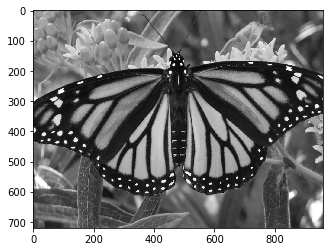

In [25]:
#Κανονικοποίηση - Εμφάνιση Εικόνας 
img2 = cv2.imread('butterfly.jpg',cv2.IMREAD_GRAYSCALE)
n_img2 = img2.astype(np.float)/255
plt.imshow(n_img2,cmap='gray')


# 1.4.1 Εφαρμογή αλγορίθμων ανίχνευσης ακμών

In [26]:
test2_image1 = EdgeDetect(n_img2,1.5,0.2,"Linear")
test2_image2 = EdgeDetect(n_img2,1.5,0.2,"Non Linear")
test2_image3 = EdgeDetect(n_img2,3,0.2,"Linear")
test2_image4 = EdgeDetect(n_img2,3,0.2,"Non Linear")

Text(0.5, 1.0, '4.Non Linear (σ,θ)=(3.0 , 0.2)')

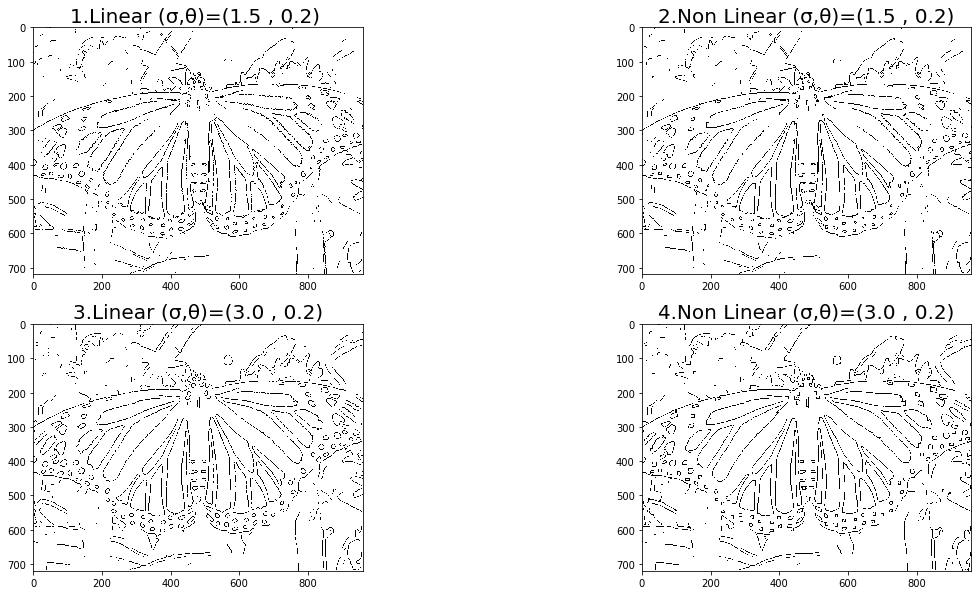

In [27]:
f, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2, figsize=(20, 10))
ax0.imshow(test2_image1  , cmap='gray_r')
ax0.set_title("1.Linear (σ,θ)=(1.5 , 0.2) ",fontsize=20)
ax1.imshow(test2_image2 , cmap='gray_r')
ax1.set_title("2.Non Linear (σ,θ)=(1.5 , 0.2)",fontsize=20)
ax2.imshow(test2_image3  , cmap='gray_r')
ax2.set_title("3.Linear (σ,θ)=(3.0 , 0.2)",fontsize=20)
ax3.imshow(test2_image4 , cmap='gray_r')
ax3.set_title("4.Non Linear (σ,θ)=(3.0 , 0.2)",fontsize=20)

# Δοκιμές Παραμέτρων σ,θ για το καλύτερο αποτέλεσμα

Text(0.5, 1.0, 'Αληθινές Ακμές Αρχικής Εικόνας')

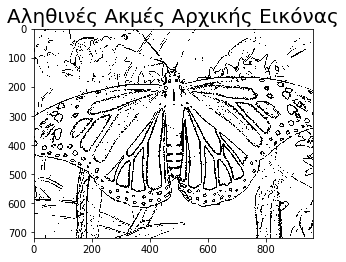

In [28]:
#1.4.2 

kern = np.array([
  [0,1,0],
  [1,1,1],
  [0,1,0]
], dtype=np.uint8)

thetarealedge=0.1

dilated_img = cv2.dilate(n_img2, kern)
eroded_img = cv2.erode(n_img2, kern)
M =dilated_img-eroded_img
T = M>thetarealedge


fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.imshow(T , cmap='gray_r')
ax.set_title("Αληθινές Ακμές Αρχικής Εικόνας",fontsize =20)

In [29]:
print("butterFLy sigma = 1.5 theta = 0.2")
print()
print("1.Linear:")
evaluation(test2_image1)
print("2.Non Linear:")
evaluation(test2_image2)
print()
print("PutterFly sigma = 3 theta = 0.2")
print()
print("3.Linear:")
evaluation(test2_image3)
print("4.Non Linear:")
evaluation(test2_image4)

butterFLy sigma = 1.5 theta = 0.2

1.Linear:
Precision = 0.9643063659780265   Recall = 0.40508788976238846 Κριτήριο ποιότητας C =  0.6846971278702075
2.Non Linear:
Precision = 0.9628344370860927   Recall = 0.40132276300680153 Κριτήριο ποιότητας C =  0.6820786000464472

PutterFly sigma = 3 theta = 0.2

3.Linear:
Precision = 0.7636846151938292   Recall = 0.33997659217383625 Κριτήριο ποιότητας C =  0.5518306036838327
4.Non Linear:
Precision = 0.7871070242164556   Recall = 0.3610325942937903 Κριτήριο ποιότητας C =  0.574069809255123


# *ΤΕΛΟΣ ΠΡΩΤΟΥ ΜΕΡΟΥΣ*